In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

In [27]:
#initialize the dataframe
df = pd.read_csv('activities.csv') #read in csv
df.columns=df.columns.str.lower() #change columns to lower case

In [28]:
df.shape #check the shape of the dataframe
##(No.of strava uploads, no.of columns i.e. various features of my activities)

(610, 94)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   activity id                   610 non-null    int64  
 1   activity date                 610 non-null    object 
 2   activity name                 610 non-null    object 
 3   activity type                 610 non-null    object 
 4   activity description          454 non-null    object 
 5   elapsed time                  610 non-null    int64  
 6   distance                      610 non-null    float64
 7   max heart rate                605 non-null    float64
 8   relative effort               605 non-null    float64
 9   commute                       610 non-null    bool   
 10  activity private note         0 non-null      float64
 11  activity gear                 462 non-null    object 
 12  filename                      607 non-null    object 
 13  athle

In [30]:
df.head(5)

,activity id,activity date,activity name,activity type,activity description,elapsed time,distance,max heart rate,relative effort,commute,...,activity count,total steps,carbon saved,pool length,training load,intensity,average grade adjusted pace,timer time,total cycles,media
0,7926971219,"Oct 6, 2022, 11:19:20 PM",Evening Run,Run,NaN,979,2.43,177.0,41.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7926971797,"Oct 1, 2022, 1:14:11 PM",Morning Run,Run,NaN,1876,4.56,193.0,78.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7926971851,"Sep 30, 2022, 10:30:53 PM",Afternoon Run,Run,NaN,857,2.19,175.0,17.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8002444329,"Oct 22, 2022, 1:03:30 PM",Morning Run,Run,NaN,1872,5.01,172.0,59.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8072862496,"Nov 5, 2022, 1:17:01 PM",Morning Run,Run,NaN,2389,6.45,177.0,110.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Create new dataframe with only columns of interest
cols = [ 'activity date', 'activity type', 'elapsed time', 'moving time', 'distance', 'relative effort', 'activity gear'  
         ,'max heart rate', 'elevation gain', 'average speed','max speed', 'calories'
       ]
df = df[cols] 
df.head()

,activity date,activity type,elapsed time,moving time,distance,relative effort,activity gear,max heart rate,elevation gain,average speed,max speed,calories
0,"Oct 6, 2022, 11:19:20 PM",Run,979,971.0,2.43,41.0,NaN,177.0,0.000000,2.505428,3.266007,199.0
1,"Oct 1, 2022, 1:14:11 PM",Run,1876,1819.0,4.56,78.0,NaN,193.0,16.222536,2.509038,3.783984,325.0
2,"Sep 30, 2022, 10:30:53 PM",Run,857,854.0,2.19,17.0,NaN,175.0,0.000000,2.568700,4.426025,147.0
3,"Oct 22, 2022, 1:03:30 PM",Run,1872,1853.0,5.01,59.0,NaN,172.0,30.677483,2.704058,3.833984,331.0
4,"Nov 5, 2022, 1:17:01 PM",Run,2389,2381.0,6.45,110.0,NaN,177.0,8.595238,2.708694,4.075976,402.0


In [32]:
##Check the datatypes and null values counts again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   activity date    610 non-null    object 
 1   activity type    610 non-null    object 
 2   elapsed time     610 non-null    int64  
 3   moving time      610 non-null    float64
 4   distance         610 non-null    float64
 5   relative effort  605 non-null    float64
 6   activity gear    462 non-null    object 
 7   max heart rate   605 non-null    float64
 8   elevation gain   607 non-null    float64
 9   average speed    610 non-null    float64
 10  max speed        607 non-null    float64
 11  calories         606 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 57.3+ KB


In [33]:
#Break date into start time and date
df['activity_date'] = pd.to_datetime(df['activity date'],format="%b %d, %Y, %I:%M:%S %p")
df['start_time'] = df['activity_date'].dt.time
df['start_date_local'] = df['activity_date'].dt.date
df['month'] = df['activity_date'].dt.month_name()
df['year'] = df['activity_date'].dt.year
df['year'] = (df['year']).astype(object) #change year from numeric to object
df['weekofyear'] = df['activity_date'].apply(lambda x: x.isocalendar().week)
df['weekofyear'] = pd.to_numeric(df['weekofyear'])

In [34]:
df.drop('activity date', axis=1, inplace=True)

In [35]:
df.head()

,activity type,elapsed time,moving time,distance,relative effort,activity gear,max heart rate,elevation gain,average speed,max speed,calories,activity_date,start_time,start_date_local,month,year,weekofyear
0,Run,979,971.0,2.43,41.0,NaN,177.0,0.000000,2.505428,3.266007,199.0,2022-10-06 23:19:20,23:19:20,2022-10-06,October,2022,40
1,Run,1876,1819.0,4.56,78.0,NaN,193.0,16.222536,2.509038,3.783984,325.0,2022-10-01 13:14:11,13:14:11,2022-10-01,October,2022,39
2,Run,857,854.0,2.19,17.0,NaN,175.0,0.000000,2.568700,4.426025,147.0,2022-09-30 22:30:53,22:30:53,2022-09-30,September,2022,39
3,Run,1872,1853.0,5.01,59.0,NaN,172.0,30.677483,2.704058,3.833984,331.0,2022-10-22 13:03:30,13:03:30,2022-10-22,October,2022,42
4,Run,2389,2381.0,6.45,110.0,NaN,177.0,8.595238,2.708694,4.075976,402.0,2022-11-05 13:17:01,13:17:01,2022-11-05,November,2022,44


In [36]:
df['activity type'].value_counts()

activity type
Run                439
Walk                64
Workout             59
Weight Training     44
Hike                 4
Name: count, dtype: int64

In [37]:
## Focuusing mainly on my running journey and workouts which enable me to run better
runs = df[df['activity type'] == 'Run']

In [38]:
#Create extra columns to create metrics which aren't in the dataset already
runs['distance'] = runs['distance'] / 1.60934 #convert km to miles
runs['elapsed minutes'] = runs['elapsed time'] /60 
runs['avg speed'] = runs['distance'] / (runs['elapsed minutes'] / 60) 
runs['avg pace'] = runs['elapsed minutes'] / runs['distance']

/var/folders/ry/35__m39131z7cj8l_yzk11t00000gn/T/ipykernel_12812/4157764839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['distance'] = runs['distance'] / 1.60934 #convert km to miles
/var/folders/ry/35__m39131z7cj8l_yzk11t00000gn/T/ipykernel_12812/4157764839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['elapsed minutes'] = runs['elapsed time'] /60
/var/folders/ry/35__m39131z7cj8l_yzk11t00000gn/T/ipykernel_12812/4157764839.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [39]:
runs.head(10)

,activity type,elapsed time,moving time,distance,relative effort,activity gear,max heart rate,elevation gain,average speed,max speed,calories,activity_date,start_time,start_date_local,month,year,weekofyear,elapsed minutes,avg speed,avg pace
0,Run,979,971.0,1.509936,41.0,NaN,177.0,0.000000,2.505428,3.266007,199.0,2022-10-06 23:19:20,23:19:20,2022-10-06,October,2022,40,16.316667,5.552368,10.806199
1,Run,1876,1819.0,2.833460,78.0,NaN,193.0,16.222536,2.509038,3.783984,325.0,2022-10-01 13:14:11,13:14:11,2022-10-01,October,2022,39,31.266667,5.437343,11.034802
2,Run,857,854.0,1.360806,17.0,NaN,175.0,0.000000,2.568700,4.426025,147.0,2022-09-30 22:30:53,22:30:53,2022-09-30,September,2022,39,14.283333,5.716339,10.496228
3,Run,1872,1853.0,3.113077,59.0,NaN,172.0,30.677483,2.704058,3.833984,331.0,2022-10-22 13:03:30,13:03:30,2022-10-22,October,2022,42,31.200000,5.986687,10.022237
4,Run,2389,2381.0,4.007854,110.0,NaN,177.0,8.595238,2.708694,4.075976,402.0,2022-11-05 13:17:01,13:17:01,2022-11-05,November,2022,44,39.816667,6.039462,9.934660
5,Run,1907,1876.0,3.169001,96.0,NaN,182.0,5.986608,2.718955,5.774024,312.0,2022-11-08 13:38:44,13:38:44,2022-11-08,November,2022,45,31.783333,5.982383,10.029449
6,Run,3376,3366.0,6.257223,192.0,NaN,185.0,52.011845,2.992953,4.529993,665.0,2022-11-13 13:31:21,13:31:21,2022-11-13,November,2022,45,56.266667,6.672395,8.992274
7,Run,2232,2174.0,4.014068,108.0,NaN,178.0,7.592857,2.971444,4.456006,405.0,2022-11-23 00:33:10,00:33:10,2022-11-23,November,2022,47,37.200000,6.474303,9.267407
8,Run,4243,4235.0,7.866579,251.0,NaN,179.0,24.466789,2.991051,5.921973,781.0,2022-11-24 15:00:29,15:00:29,2022-11-24,November,2022,47,70.716667,6.674448,8.989507
9,Run,1814,1814.0,3.169001,65.0,Saucony Endorphin Pro 3 Race shoes,178.0,17.200012,2.815022,4.102051,310.0,2022-11-30 00:29:11,00:29:11,2022-11-30,November,2022,48,30.233333,6.289087,9.540336


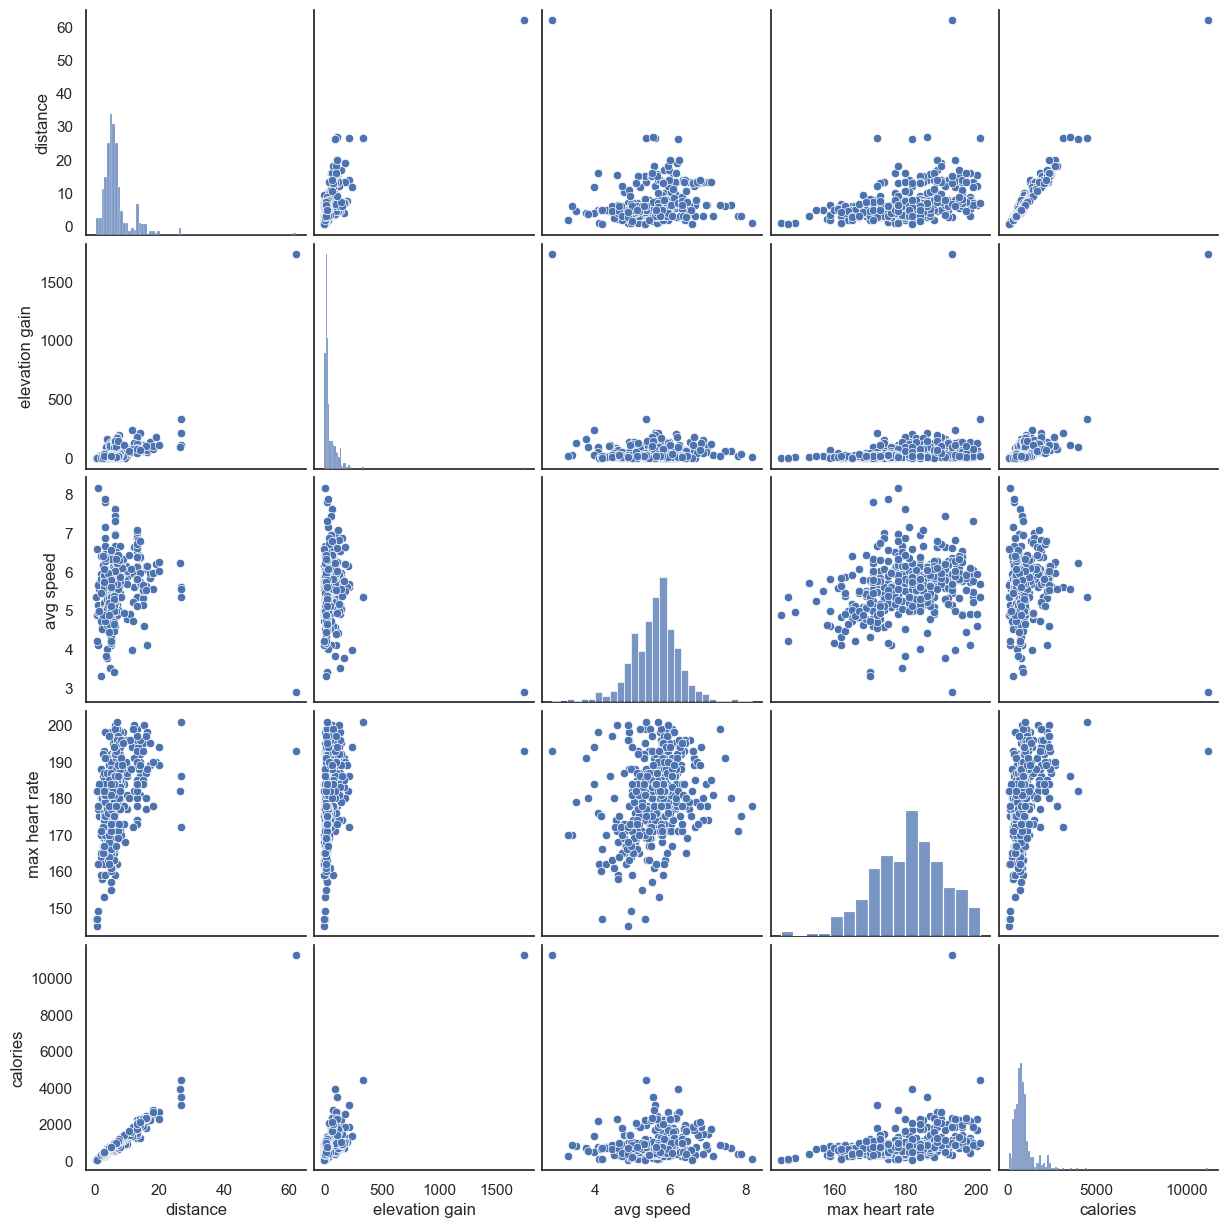

In [40]:
pp_df = runs[['distance', 'elevation gain', 'avg speed', 'max heart rate', 'calories']]
sns.pairplot(pp_df)

In [41]:
## Removing my ultramarathon to get a better understanding of my runs
runs = runs[runs.distance < 60]

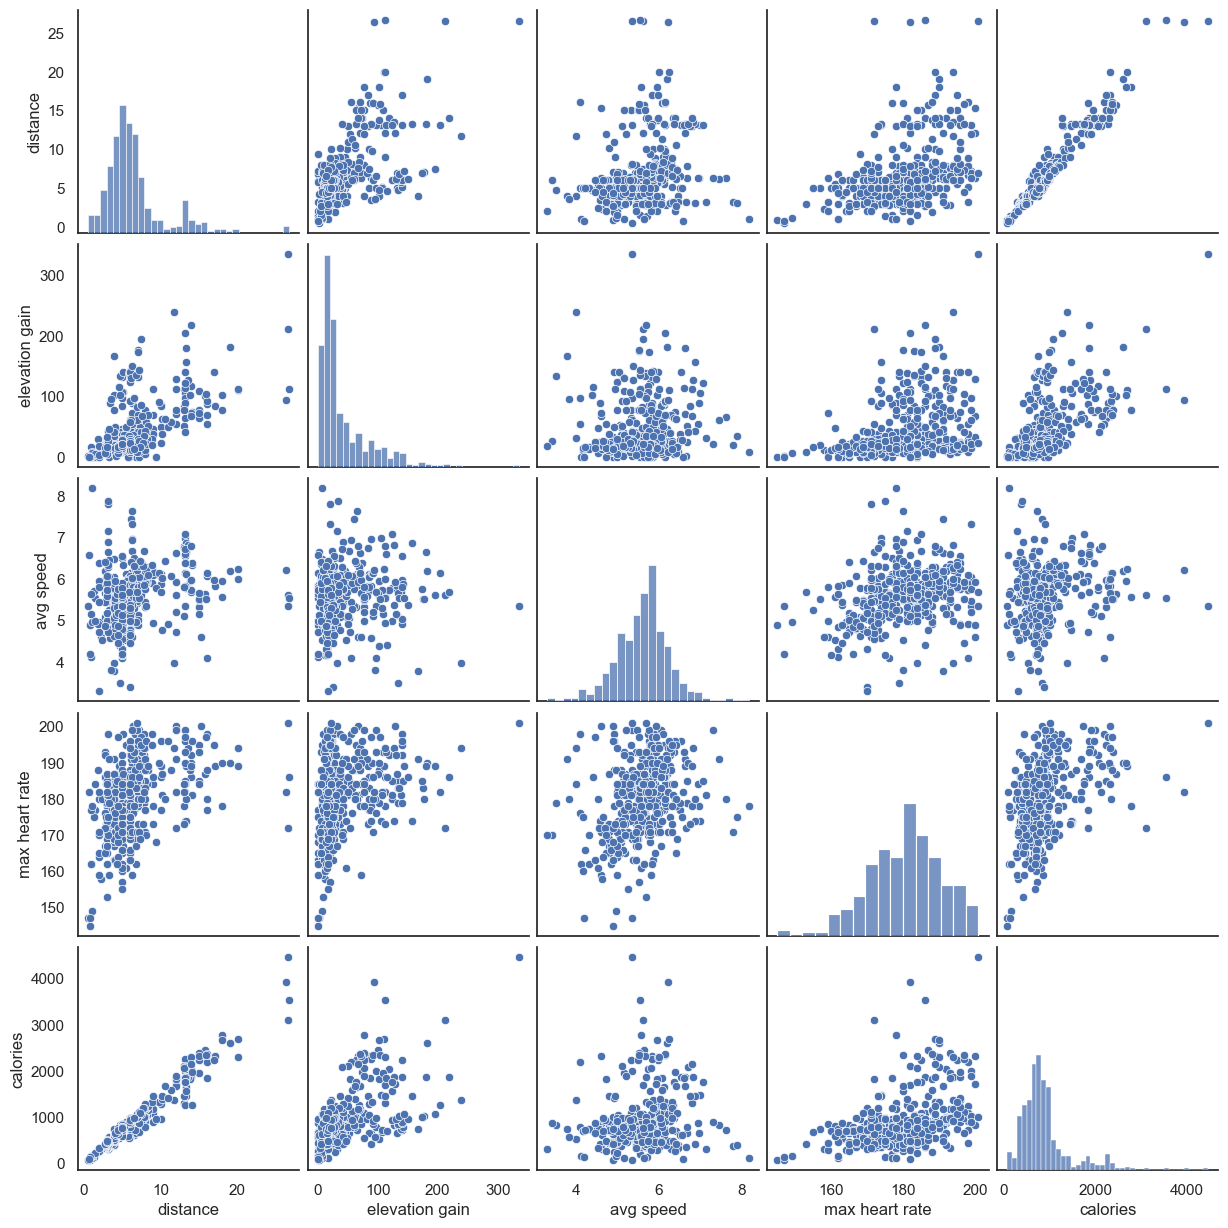

In [42]:
pp_df = runs[['distance', 'elevation gain', 'avg speed', 'max heart rate', 'calories']]
sns.pairplot(pp_df)

In [43]:
runs.describe().round(0)

,elapsed time,moving time,distance,relative effort,max heart rate,elevation gain,average speed,max speed,calories,activity_date,weekofyear,elapsed minutes,avg speed,avg pace
count,438.0,438.0,438.0,436.0,436.0,437.0,438.0,437.0,436.0,438,438.0,438.0,438.0,438.0
mean,4191.0,3989.0,7.0,155.0,180.0,43.0,3.0,5.0,902.0,2024-01-30 06:13:09.977168640,28.0,70.0,6.0,11.0
min,368.0,308.0,1.0,1.0,145.0,0.0,2.0,3.0,73.0,2022-09-30 22:30:53,1.0,6.0,3.0,7.0
25%,2765.0,2695.0,4.0,75.0,173.0,15.0,2.0,4.0,583.0,2023-08-13 04:56:41.750000128,16.0,46.0,5.0,10.0
50%,3765.0,3586.0,6.0,120.0,181.0,24.0,3.0,4.0,776.0,2024-02-18 06:32:22,29.0,63.0,6.0,11.0
75%,4610.0,4294.0,7.0,184.0,187.0,56.0,3.0,5.0,990.0,2024-07-26 22:27:59.249999872,40.0,77.0,6.0,11.0
max,17839.0,17517.0,27.0,1189.0,201.0,335.0,4.0,12.0,4463.0,2025-01-08 11:52:56,52.0,297.0,8.0,18.0
std,2484.0,2374.0,4.0,132.0,10.0,45.0,0.0,1.0,569.0,NaN,14.0,41.0,1.0,1.0


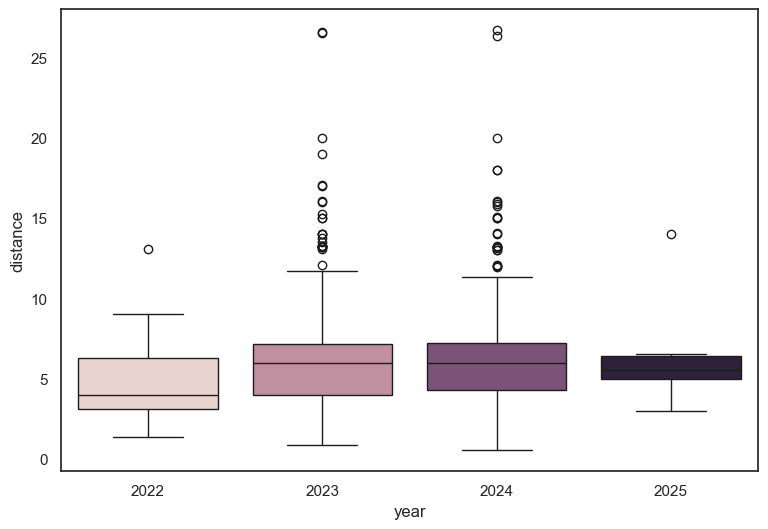

In [44]:
##Distirbution of distance per year

fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x="year", y="distance", hue="year", data=runs)
ax.legend_.remove()
plt.gcf().set_size_inches(9, 6)

/var/folders/ry/35__m39131z7cj8l_yzk11t00000gn/T/ipykernel_12812/1571462461.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='distance', data=runs, hue='year', ci=None, estimator=np.sum, palette = 'hot',


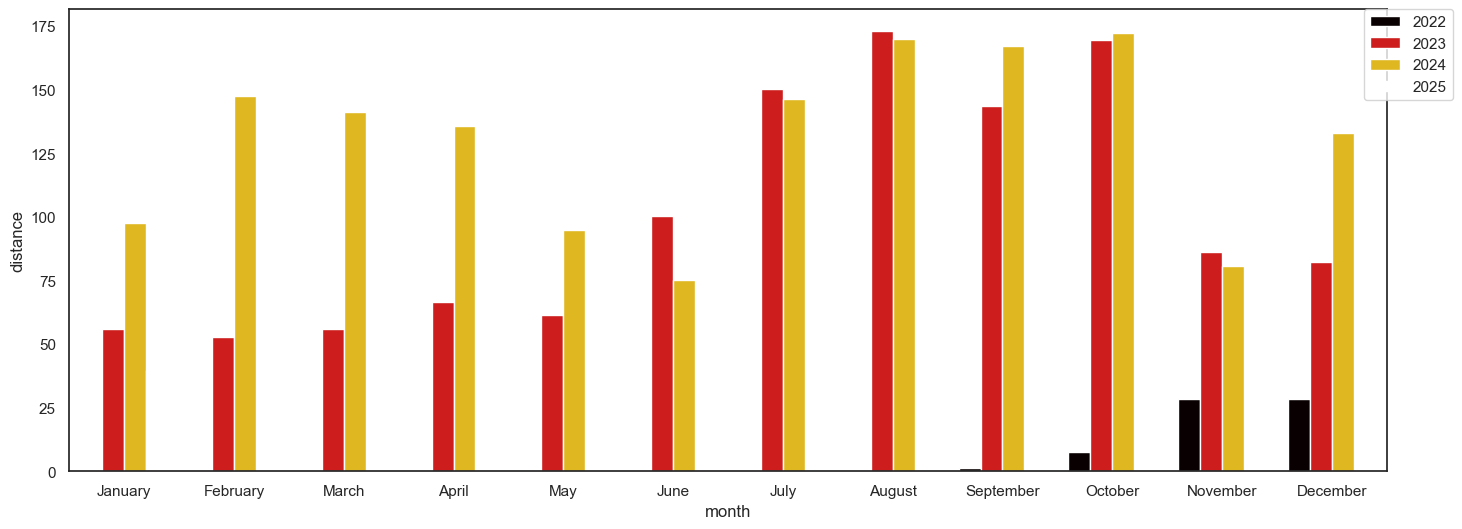

In [45]:
# Comparing the monthly distances for each year 

sns.set_style('white')
sns.barplot(x='month', y='distance', data=runs, hue='year', ci=None, estimator=np.sum, palette = 'hot',
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(17, 6)
plt.legend(loc='upper center')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)

In [46]:
runs['season'] = 'unknown'
runs.loc[(runs["month"].isin(["March", "April", "May"])), 'season'] = 'Spring'
runs.loc[(runs["month"].isin(["June", "July", "August"])), 'season'] = 'DALLAS PEAK SUMMER'
runs.loc[(runs["month"].isin(["September", "October", "November"])), 'season'] = 'DALLAS SUMMER'
runs.loc[(runs["month"].isin(["December", "January", "February"])), 'season'] = 'Winter'

/var/folders/ry/35__m39131z7cj8l_yzk11t00000gn/T/ipykernel_12812/2791211169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="season", y="distance", palette="Set2",


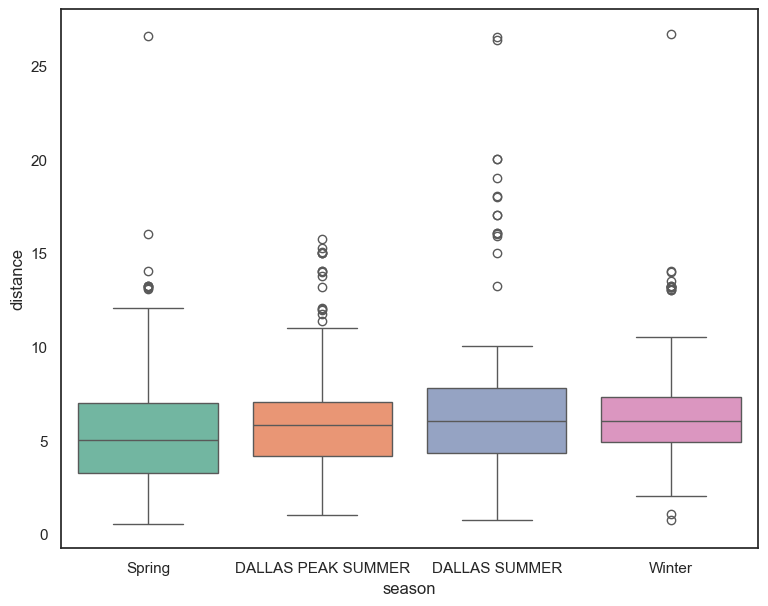

In [47]:
## Plotting the distances run based on seasons

ax = sns.boxplot(x="season", y="distance", palette="Set2",
                    data=runs,
                    order =["Spring", 'DALLAS PEAK SUMMER', 'DALLAS SUMMER', 'Winter'])
plt.gcf().set_size_inches(9, 7)

In [48]:
marathon = runs[runs.distance > 26]
marathon.head()

,activity type,elapsed time,moving time,distance,relative effort,activity gear,max heart rate,elevation gain,average speed,max speed,...,activity_date,start_time,start_date_local,month,year,weekofyear,elapsed minutes,avg speed,avg pace,season
37,Run,17069,16966.0,26.594753,333.0,Saucony Endorphin Pro 3 Race shoes,172.0,212.0,2.522751,6.22,...,2023-04-01 12:31:44,12:31:44,2023-04-01,April,2023,13,284.483333,5.609064,10.696972,Spring
215,Run,17839,17517.0,26.551257,1189.0,New Balance Trainers NYC race shoes,201.0,335.0,2.439630,5.50,...,2023-11-05 14:48:03,14:48:03,2023-11-05,November,2023,44,297.316667,5.358177,11.197838,DALLAS SUMMER
253,Run,17324,17307.0,26.706600,906.0,Saucony Endorphin Speed 3 Blue wave,186.0,112.0,2.483677,4.00,...,2024-01-07 10:32:00,10:32:00,2024-01-07,January,2024,1,288.733333,5.549744,10.811310,Winter
553,Run,15272,15231.0,26.364845,400.0,Saucony Endorphin speed 4 Indy,182.0,94.0,2.785897,11.48,...,2024-11-09 13:07:05,13:07:05,2024-11-09,November,2024,45,254.533333,6.214867,9.654270,DALLAS SUMMER


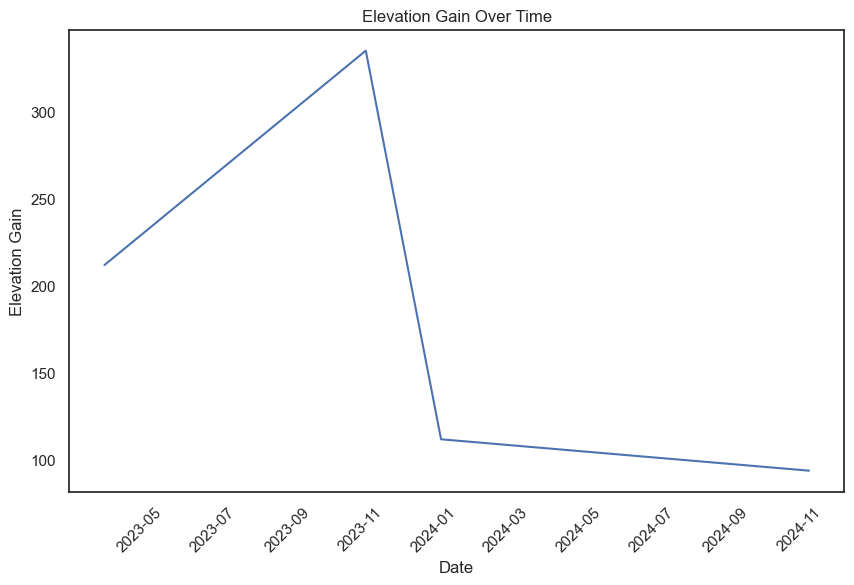

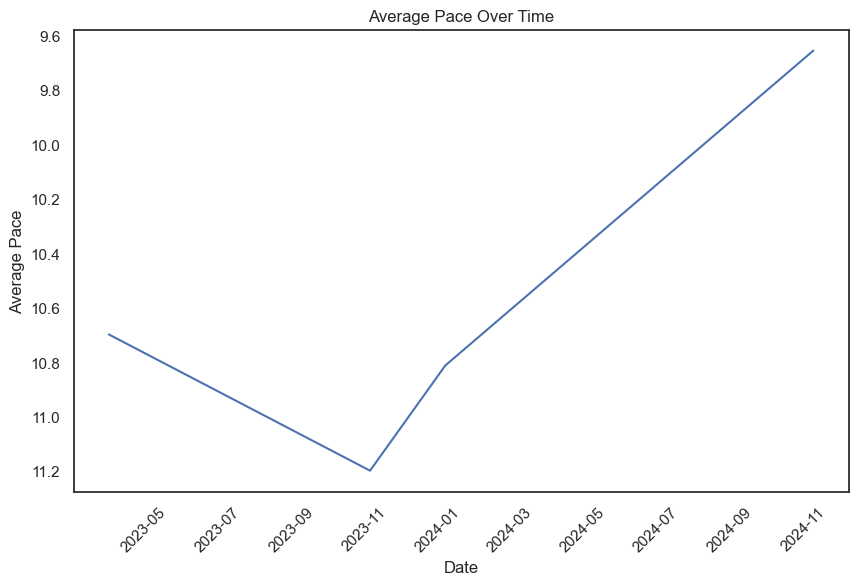

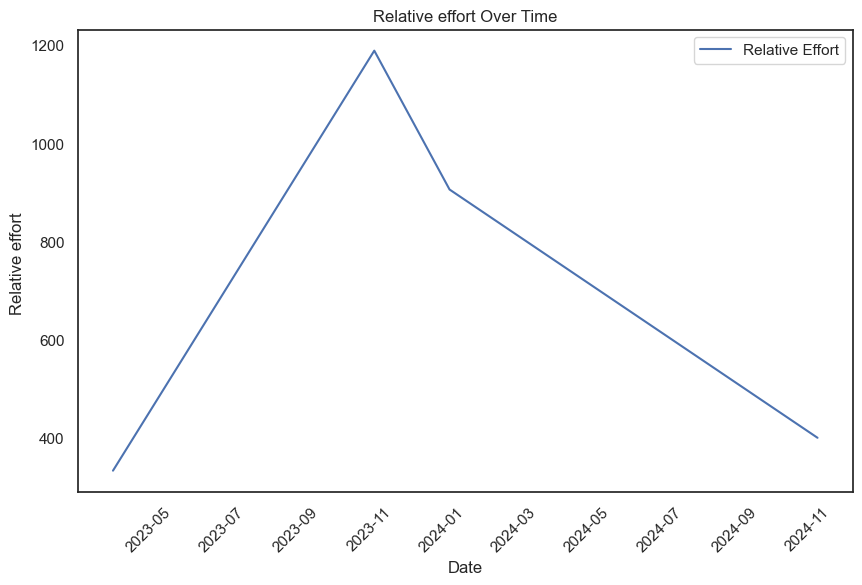

In [52]:
# Select the relevant columns from the marathon dataframe
marathon_plot_data = marathon[['relative effort', 'elevation gain', 'activity_date', 'avg pace']]


# Plot 1: Elevation
plt.figure(figsize=(10, 6))
plt.plot(marathon_plot_data['activity_date'], marathon_plot_data['elevation gain'])
plt.xlabel('Date')
plt.ylabel('Elevation Gain')
plt.title('Elevation Gain Over Time')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Pace
plt.figure(figsize=(10, 6))
plt.plot(marathon_plot_data['activity_date'], marathon_plot_data['avg pace'])
plt.xlabel('Date')
plt.gca().invert_yaxis()
plt.ylabel('Average Pace')
plt.title('Average Pace Over Time')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Relative effort
plt.figure(figsize=(10, 6))
plt.plot(marathon_plot_data['activity_date'], marathon_plot_data['relative effort'], label='Relative Effort')
plt.xlabel('Date')
plt.ylabel('Relative effort ')
plt.title('Relative effort Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()